In [164]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Custom functions

In [165]:
def data_viz(df, columns, target=None, plot_type='bar'):
    subplots_in_a_row = 0
    number_of_columns = len(columns)
    
    if plot_type=='hist':
        subplots_in_a_row = 4
    else:
        subplots_in_a_row = 2
    
    number_of_rows, remainder = divmod(number_of_columns, subplots_in_a_row)
    if remainder != 0:
        number_of_rows += 1
    fig, axes = plt.subplots(number_of_rows, subplots_in_a_row, figsize=(22, number_of_rows*6))
    
    #univariate
    if plot_type=='box':
        for col, subplot in zip(columns, axes.flatten()):
            sns.boxplot(df[col], ax=subplot)
    elif plot_type=='hist':
        for col, subplot in zip(columns, axes.flatten()):
            sns.distplot(df[col], ax=subplot)
    elif plot_type == 'bar':
        for col, subplot in zip(columns, axes.flatten()):
            sns.countplot(df[col], ax=subplot)
            
    #Bivariate
    elif plot_type=='scatter':
        for col, subplot in zip(columns, axes.flatten()):
            sns.scatterplot(x=col, y=target, data=df, ax=subplot)
    elif plot_type=='bar_target':
        for col, subplot in zip(columns, axes.flatten()):
            ct = pd.crosstab(df[col], df[target]) #creates cross table
            ct.plot.bar(ax=subplot)
    

In [166]:
train = pd.read_csv('train.csv')

In [167]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [168]:
train.shape

(54808, 14)

In [169]:
target_column = 'is_promoted'
numeric_columns = train.select_dtypes(exclude=['object']).columns.tolist()
numeric_columns.remove('employee_id')
numeric_columns.remove('no_of_trainings')
numeric_columns.remove('awards_won?')
numeric_columns.remove('KPIs_met >80%')
numeric_columns.remove('is_promoted')

categoric_columns = train.select_dtypes(include=['object']).columns.tolist()
categoric_columns.append('no_of_trainings')
categoric_columns.append('awards_won?')
categoric_columns.append('KPIs_met >80%')
len(numeric_columns), len(categoric_columns)

(4, 8)

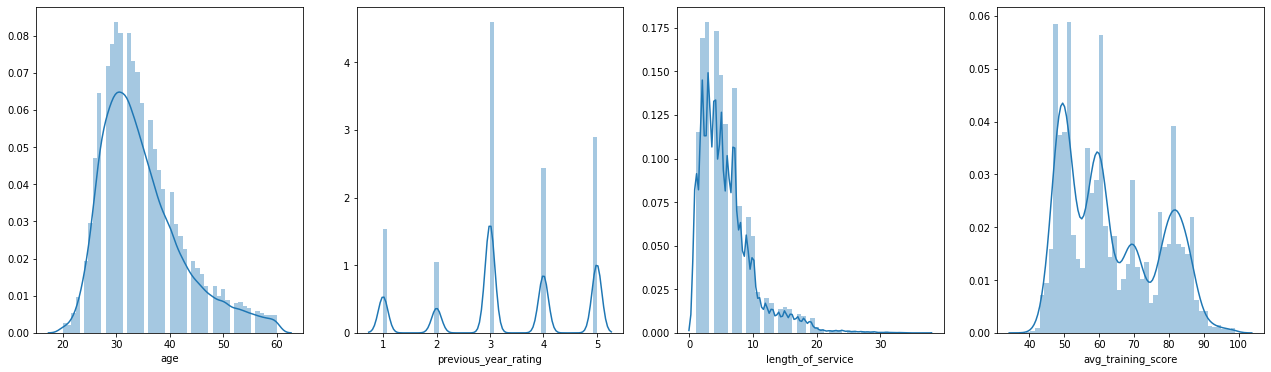

In [170]:
data_viz(train, numeric_columns, plot_type='hist')

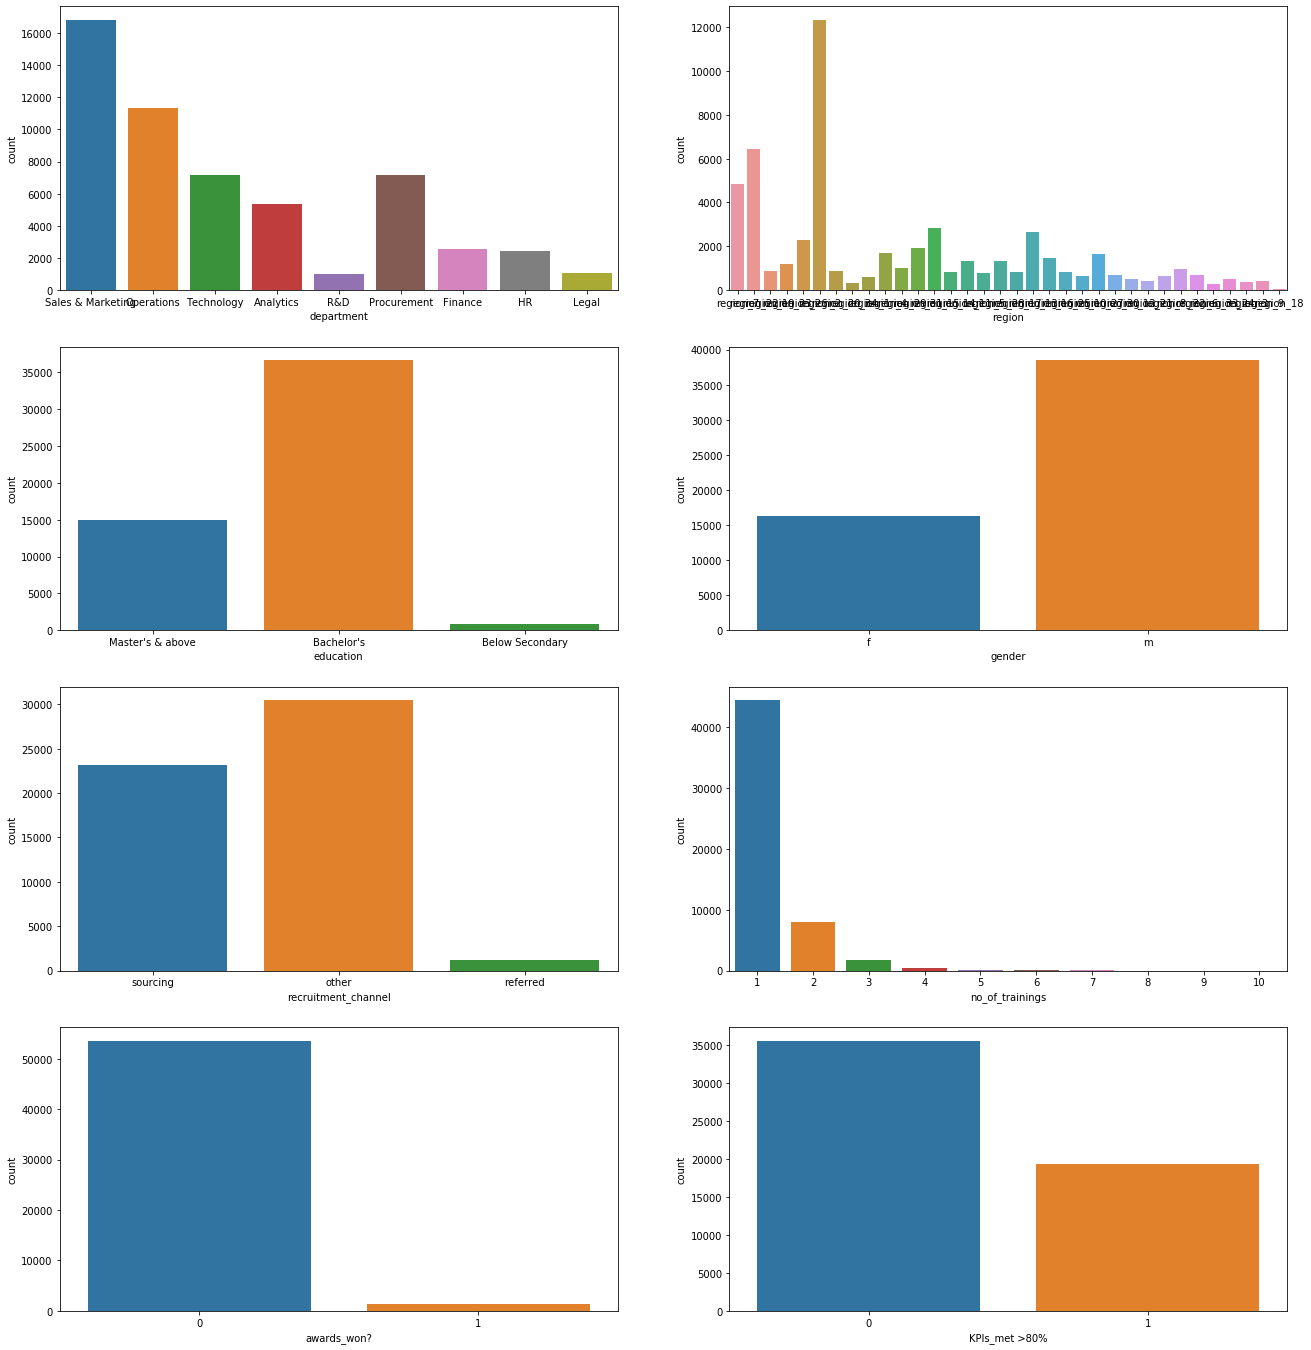

In [171]:
data_viz(train, categoric_columns, plot_type='bar')

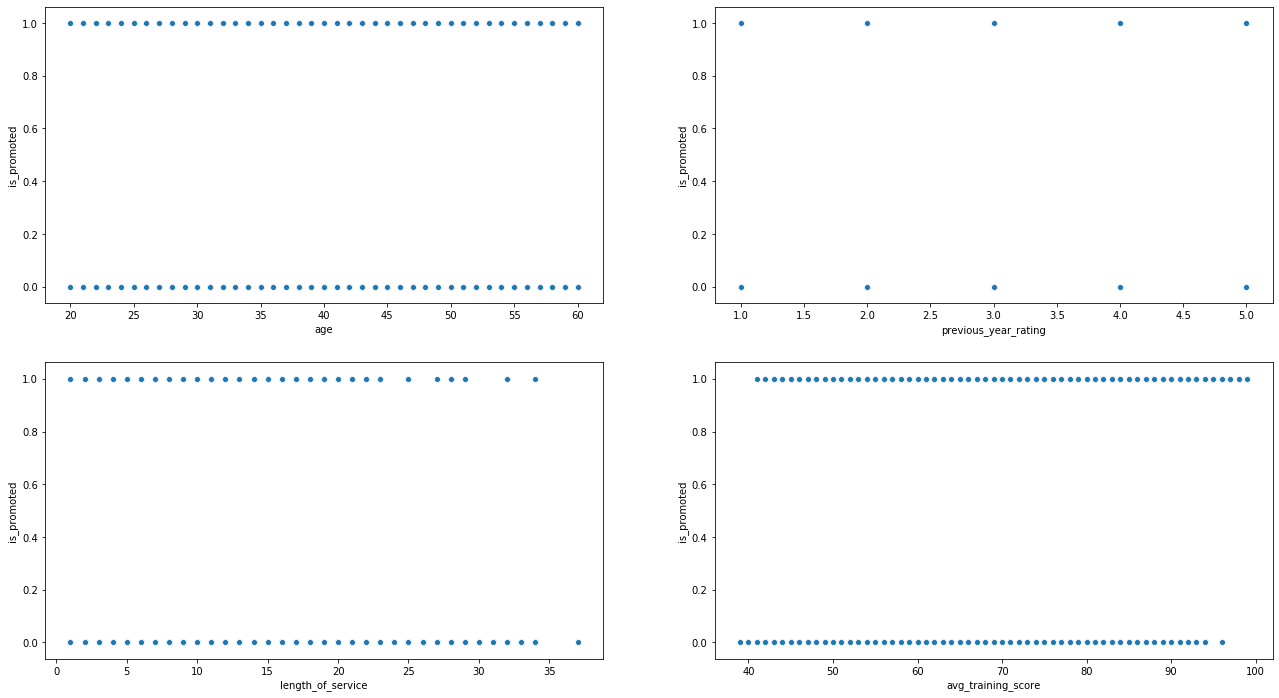

In [172]:
data_viz(train, numeric_columns,target= target_column,plot_type='scatter')

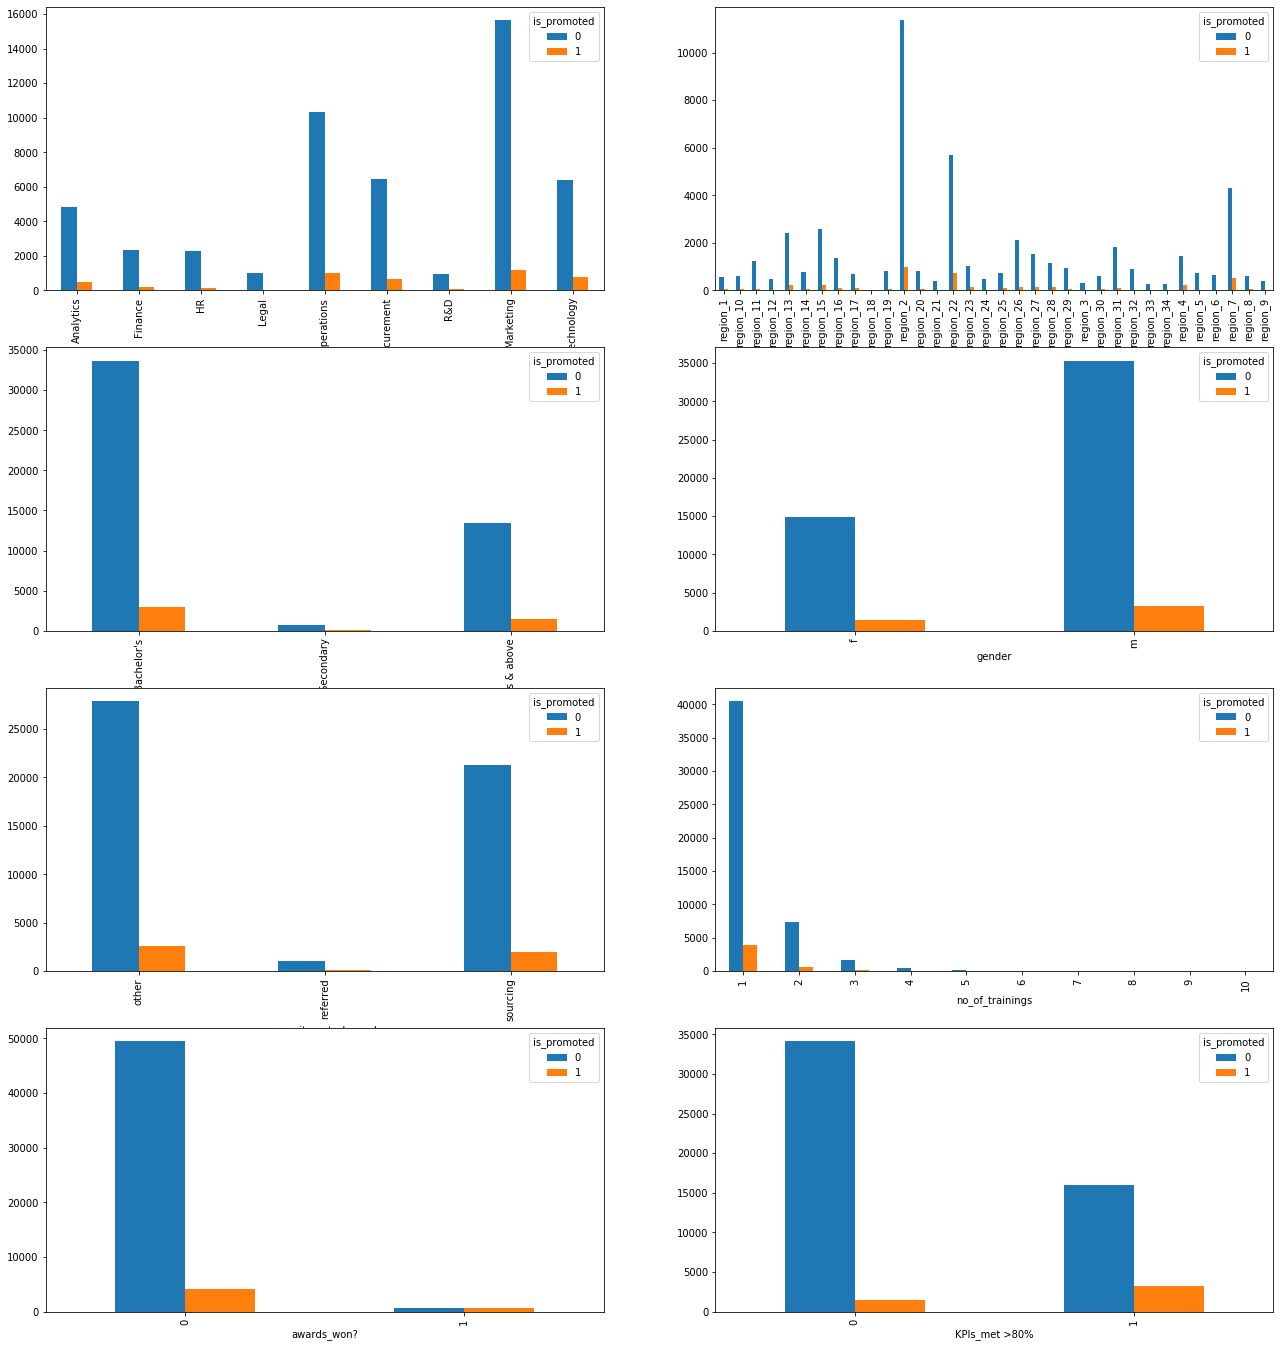

In [173]:
data_viz(train, categoric_columns,target= target_column, plot_type='bar_target')

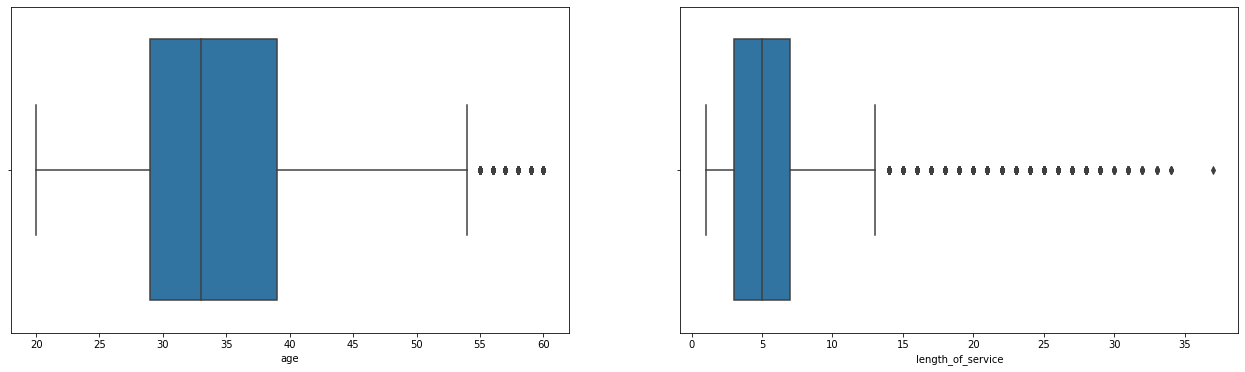

In [174]:
outlier_columns = ['age', 'length_of_service']
data_viz(df=train, columns=outlier_columns,plot_type="box")